# <a id='toc1_'></a>[**TikTok_Predictive_Model_Development**](#toc0_)

**Course 6 - The Nuts and Bolts of Machine Learning**

**Table of contents**<a id='toc0_'></a>    
- [**TikTok_Predictive_Model_Development**](#toc1_)    
  - [**Scenario**](#toc1_1_)    
    - [Email from Project Manager Officer](#toc1_1_1_)    
    - [Email from Data Science Lead](#toc1_1_2_)    
    - [Data Dictionary](#toc1_1_3_)    
    - [Objectives](#toc1_1_4_)    
  - [**Classify videos using machine learning**](#toc1_2_)    
  - [**PACE Stages**](#toc1_3_)    
  - [**PACE: Plan**](#toc1_4_)    
    - [Task 1. Imports and data loading](#toc1_4_1_)    
  - [**PACE: Analyze**](#toc1_5_)    
    - [Task 2: Examine data, summary info, and descriptive stats](#toc1_5_1_)    
  - [**PACE: Construct**](#toc1_6_)    
    - [Task 3: Feature engineering](#toc1_6_1_)    
    - [Task 4: Split the data](#toc1_6_2_)    
      - [Task 5: Create train/validate/test sets](#toc1_6_2_1_)    
    - [Task 6. Build models](#toc1_6_3_)    
      - [Build a random forest model](#toc1_6_3_1_)    
      - [Build an XGBoost model](#toc1_6_3_2_)    
  - [**PACE: Execute**](#toc1_7_)    
    - [Task 7. Evaluate model](#toc1_7_1_)    
      - [Random forest](#toc1_7_1_1_)    
      - [XGBoost](#toc1_7_1_2_)    
      - [Use champion model to predict on test data](#toc1_7_1_3_)    
      - [Feature importances of champion model](#toc1_7_1_4_)    
    - [Task 8. Conclusion](#toc1_7_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[**Scenario**](#toc0_)

The data team at TikTok are close to completing the claims classification project. Earlier, the data team completed a project proposal, and used Python to explore and analyze the claims dataset, created data visualizations, and conducted a statistical test. Most recently, the team built a logistic regression model to predict whether statements are claims or opinions within submissions, based on the `verified_status` variable within the claims dataset. 

Operations Manager, Maika Abadi mentioned that there are some questions from stakeholders in other departments, which he would like to share before the process of building the final begins.

Data Science Lead, Willow Jaffey determined that an effective final model could be approached in several ways, such as Naive Bayes or tree-based models. However, Willow and the team have decided to develop a random forest model during the evaluation stage for this project. 

At the start of a new week, you receive an email from Mary Joanna Rodgers, the Project Management Officer. TikTok leadership has some consideration for the data team as the team approaches the final model. You also receive a follow-up email from Willow asking you to build the final model and prepare an executive summary to share the results. 

### <a id='toc1_1_1_'></a>[Email from Project Manager Officer](#toc0_)

**Subject:** Approaching the final claims model

**From:** "Rodgers, Mary Joanna" - maryjoannarodgers@tiktok

**Cc:** "Rainier, Orion" - orionrainier@tiktok; "Jaffey, Willow" - willowjaffey@tiktok; "Bradshaw, Rosie Mae" - rosiemaebradshaw@tiktok; "Abadi, Maika," - maikaabadi@tiktok;

Hello TikTok team,

The leadership team would like to recognize what an excellent job the team has done on the executive summaries throughout this project. Your hard work and dedication to assisting TikTok users is greatly appreciated. 

Operations Lead, Maika Abadi brought to our attention some concerns from stakeholders in other departments. As your team continues to move forward building the final predictive model, the leadership team would like you to consider the following:

1. Which modeling solution did the team choose for the final claims model?

2. What criteria did the data team use to determine their modeling approach?

3. What are the ethical implications of the final claims model?

4. What are the consequences if our claims model makes errors?

5. Do the benefits of such a model outweigh the potential problems?

6. After evaluating the model, should TikTok proceed with using this model?

7. Consider the impact that "banned authors" have on claims or opinions. To what extent do those authors make claims or opinions? 

**Note:** For the purposes of this fictional project, "Banned authors" are users who submitted videos that "violated the terms of service."

1. With the results from your model, consider what the next steps would be for future video reviews, or downstream evaluation. Would TikTok need a team member to review the video content? If so, at what part of the process would a review be the most useful?

Perhaps these questions can guide your final executive summary? Also, include an idea of the confidence your team has in the accuracy of the claims model.  

Thank you for your great work,

Mary Joanna Rodgers

Project Management Officer

TikTok

*Network with TikTok employees from a variety of teams and locations. Participate in **TikTok Tuesdays**, every Tuesday @2pm EST.*

### <a id='toc1_1_2_'></a>[Email from Data Science Lead](#toc0_)

**Subject:** Claim model considerations

**From:** "Jaffey, Willow" - willowjaffey@tiktok

**Cc:** "Bradshaw, Rosie Mae" - rosiemaebradshaw@tiktok

Happy Monday!

You have done great work so far. We are in the final stage of the claims classification project and I am excited to see the final claims model and how it can help TikTok streamline the claims process overall.

I’ve determined that an effective final model could be approached in several ways, such as a Naive Bayes or tree-based model. However, having looked at the data analysis so far, I believe our most effective method for the sample dataset is a random forest model. 

Once complete, please send an executive summary of your random forest model and results to Rosie Mae and myself so we can prepare to present the results to the leadership team. Be sure to include what was requested in the email from Mary Joanna, a summary of the variables used to make the prediction, and an idea of the accuracy of the model.

I look forward to seeing what you build! 

Willow Jaffey

Data Science Lead

TikTok

### <a id='toc1_1_3_'></a>[Data Dictionary](#toc0_)

**TikTok Dataset Overview**

This project uses a dataset called `tiktok_dataset.csv`. It contains synthetic data created for this project in partnership with TikTok. Examine each data variable gathered.

**19,383 rows** – Each row represents a different published TikTok video in which a claim/opinion has been made.

**12 columns**

| Column name                | Type  | Description |
|---------------------------|-------|-------------|
| `#`                       | int   | TikTok assigned number for video with claim/opinion. |
| `claim_status`            | obj   | Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal beliefs or thoughts. A “claim” refers to information that is either unsourced or from an unverified source. |
| `video_id`                | int   | Random identifying number assigned to a video upon publication on TikTok. |
| `video_duration_sec`      | int   | How long the published video is measured in seconds. |
| `video_transcription_text`| obj   | Transcribed text of the words spoken in the published video. |
| `verified_status`         | obj   | Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.” |
| `author_ban_status`       | obj   | Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.” |
| `video_view_count`        | float | The total number of times the published video has been viewed. |
| `video_like_count`        | float | The total number of times the published video has been liked by other users. |
| `video_share_count`       | float | The total number of times the published video has been shared by other users. |
| `video_download_count`    | float | The total number of times the published video has been downloaded by other users. |
| `video_comment_count`     | float | The total number of comments on the published video. |

### <a id='toc1_1_4_'></a>[Objectives](#toc0_)

**The purpose** of this model is to increase repsonse time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".

There are three parts:

**Part 1:** Ethical Considerations
* Consider the ehtical implications of the request
* Should the objective of the model be adjusted?

**Part 2:** Feature Engineering
* Perform feature selection, extraction and transformation to prepare the data for modelling.

**Part 3:** Modelling
* Build the models, evaluate them, and advise on next steps

## <a id='toc1_2_'></a>[**Classify videos using machine learning**](#toc0_)

## <a id='toc1_3_'></a>[**PACE Stages**](#toc0_)

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## <a id='toc1_4_'></a>[**PACE: Plan**](#toc0_)

1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


1. I am being asked to build and evaluate a machine learning model that can classify TikTok videos as either claims or opinions. The primary objective is to reduce the backlog of user-reported videos by prioritising claim-related content for moderation. Success can be measured by model performance evaluation metrics such as accuracy, precision, recall and F1 score, with a particular emphasis on recall for claims. This is because if recall is low, then the model fails to detect many true claims which means harmful or misleading content could slip through moderation. This would undermine TikTok's goal of protecting users and reduces trust in the platform.

2. 
    * False Negative (video contains a claim but is classified as opinion): This may allow potentially harmful misinformation to remain unchecked on the platform, reducing trust and possibly causing reputational or even real-world harm.

    * False Positive (video is classified as a claim but is actually an opinion): This may waste moderation resources by unnecessarily flagging opinion videos, causing inefficiencies in review. However, this risk is less severe than letting harmful claims slip through.

The ethical implication is that user safety and trust could be undermined if claims are overlooked, so the model should be tuned to minimize false negatives, even if that slightly increases false positives.

3. I would proceed by:
    * Perform feature engineering
    * Train a Random Forest Model using either Cross-Validation or a seperate Validation set or both.
    * Hyperparameter Tuning of the Model
    * Compute evaluation metrics for the model with a focus on recall.
    * If multiple models are made for comparision, choose a champion model, based on recall, and then evaluate that model with the test data.

**Modeling workflow and model selection process**

Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:

1. Split the data into train/validation/test sets (60/20/20)
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)


### <a id='toc1_4_1_'></a>[Task 1. Imports and data loading](#toc0_)

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [16]:
# Import packages for data manipulation

import numpy as np
import pandas as pd

# Import packages for data visualization

import matplotlib.pyplot as plt
import seaborn as sns


# Import packages for data preprocessing

from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit

# Import packages for data modeling

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

## <a id='toc1_5_'></a>[**PACE: Analyze**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### <a id='toc1_5_1_'></a>[Task 2: Examine data, summary info, and descriptive stats](#toc0_)

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows

data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns

data.shape

(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns

data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [7]:
# Get basic information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats

data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [9]:
# Check for missing values

data.isnull().any(axis=1).sum()


np.int64(298)

In [10]:
# Drop rows with missing values

data = data.dropna(axis=0)

In [11]:
# Display first few rows after handling missing values

data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [12]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

Check for and handle outliers

**Tree-Based Models are robust to outliers and so there is no need to impute or drop any values based on where they fall in their distribution.**

Check class balance

In [13]:
# Check class balance

data['claim_status'].value_counts(normalize=True)


claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

## <a id='toc1_6_'></a>[**PACE: Construct**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### <a id='toc1_6_1_'></a>[Task 3: Feature engineering](#toc0_)

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [14]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe

data['text_length'] = data['video_transcription_text'].str.len()

Calculate the average `text_length` for claims and opinions.

In [15]:
# Calculate the average text_length for claims and opinions

data[['claim_status', 'text_length']].groupby('claim_status')[['text_length']].mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

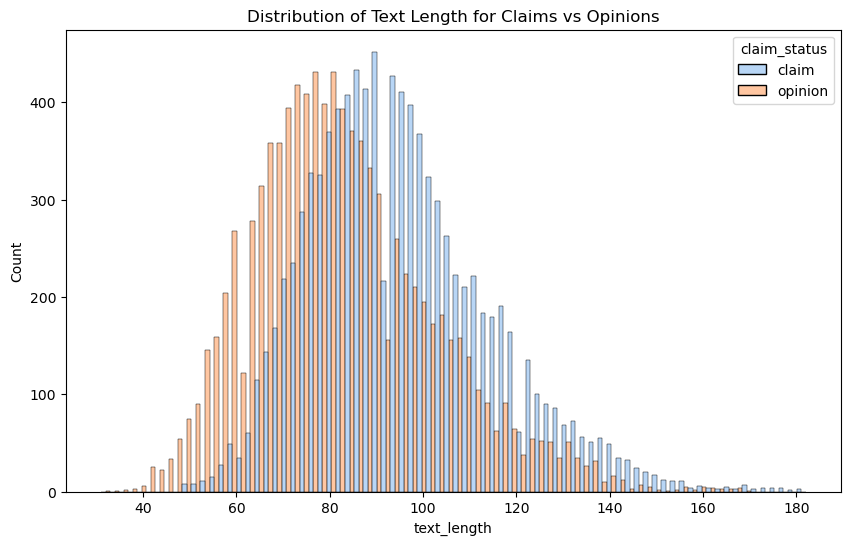

In [21]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

plt.figure(figsize=(10,6))

sns.histplot(data = data, x='text_length', hue = 'claim_status', stat = 'count', multiple = 'dodge',
             kde = False, palette = 'pastel', element = 'bars', legend = True)

plt.title("Distribution of Text Length for Claims vs Opinions")
plt.xlabel("text_length")
plt.ylabel("Count")
plt.show()

**Feature selection and transformation**

Encode target and catgorical variables.

In [23]:
# Create a copy of the X data

X = data.copy()

# Drop unnecessary columns

X = X.drop(['#','video_id', 'video_transcription_text'], axis=1)

# Encode target variable

X['claim_status'] = X['claim_status'].map({'opinion': 0,
                                           'claim': 1})

# Dummy encode remaining categorical values

X = pd.get_dummies(X, columns = ['verified_status', 'author_ban_status'], drop_first = False)

### <a id='toc1_6_2_'></a>[Task 4: Split the data](#toc0_)

Assign target variable.

In [24]:
# Isolate target variable

y = X['claim_status']

Isolate the features.

In [25]:
# Isolate features

X = X.drop(['claim_status', 'verified_status_not verified', 'author_ban_status_under review'], axis=1)

# Display first few rows of features dataframe

X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_active,author_ban_status_banned
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,False
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,True,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,True,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,True,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,True,False


#### <a id='toc1_6_2_1_'></a>[Task 5: Create train/validate/test sets](#toc0_)

Split data into training and testing sets, 80/20.

In [26]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [27]:
# Split the training data into training and validation sets

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [28]:
# Get shape of each training, validation, and testing set

X_tr.shape, X_val.shape, X_test.shape, y_tr.shape, y_val.shape, y_test.shape

((11450, 10), (3817, 10), (3817, 10), (11450,), (3817,), (3817,))

### <a id='toc1_6_3_'></a>[Task 6. Build models](#toc0_)


#### <a id='toc1_6_3_1_'></a>[Build a random forest model](#toc0_)

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [29]:
# Instantiate the random forest classifier

rf = RandomForestClassifier(random_state = 42)

# Create a dictionary of hyperparameters to tune

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75,100,125,150]
             }

# Define a list of scoring metrics to capture

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [30]:
%%time
### Fit the model to the data 

rf_cv.fit(X_tr, y_tr)

CPU times: total: 24min 34s
Wall time: 24min 53s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [31]:
# Examine best recall score

rf_cv.best_score_


np.float64(0.9913766326500252)

In [32]:
# Examine best parameters

rf_cv.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 75}

Check the precision score to make sure the model isn't labeling everything as claims. You can do this by using the `cv_results_` attribute of the fit `GridSearchCV` object, which returns a numpy array that can be converted to a pandas dataframe. Then, examine the `mean_test_precision` column of this dataframe at the index containing the results from the best model. This index can be accessed by using the `best_index_` attribute of the fit `GridSearchCV` object.

In [33]:
# Access the GridSearch results and convert it to a pandas df

cv_results = pd.DataFrame(rf_cv.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index
cv_results['mean_test_precision'].loc[rf_cv.best_index_]

np.float64(0.9996521739130435)

**Question:** How well is your model performing? Consider average recall score and precision score.

**Recall Score:** 0.99 - The model is correctly identifying almost all the true claims, with very few false negatives.

**Precision Score:** 0.999 - When the model predicts a claim, it is almost always correct, with almost no false positives.

This balance between the model's recall and precision henceforth suggests that the model has achieved a nearly perfect classification performance. However, these incredibly high results may be indicative of the model overfitting the data, especially if the dataset is not large or fully representative. The model should be evaluated on unseen data to check it isn't overfitting the data.

#### <a id='toc1_6_3_2_'></a>[Build an XGBoost model](#toc0_)

In [34]:
# Instantiate the XGBoost classifier

from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', random_state=42)

# Create a dictionary of hyperparameters to tune

cv_params_2 = {'max_depth': [4,5,10],
             'min_child_weight': [4,8,10],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75,100,125],
             'colsample_bytree': [0.25, 0.5, 0.75]
            }

# Define a list of scoring metrics to capture

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object

xgb_cv = GridSearchCV(xgb, cv_params_2, scoring = scoring, cv = 5, refit = 'recall')

In [35]:
%%time
# Fit the model to the data

xgb_cv.fit(X_tr, y_tr)


CPU times: total: 10min 20s
Wall time: 1min 39s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.25, 0.5, 0.75],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 10],
                         'min_child_weight': [4, 8, 10],
                         'n_estimators': [75, 100, 125]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [36]:
# Examine best recall score

xgb_cv.best_score_


np.float64(0.9901695873374787)

In [37]:
# Examine best parameters

xgb_cv.best_params_


{'colsample_bytree': 0.75,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 100}

Repeat the steps used for random forest to examine the precision score of the best model identified in the grid search.

In [38]:
# Access the GridSearch results and convert it to a pandas df

cv_results_2 = pd.DataFrame(xgb_cv.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index

cv_results_2['mean_test_precision'].loc[xgb_cv.best_index_]


np.float64(0.9986095893761189)

**Question:** How well does your model perform? Consider recall score and precision score.

**Recall Score:** 0.99 - The model correctly identified all claims with very few false negatives.

**Precision Score:** 0.998 - Every video predicted as a claim was actually a claim with very few false positives.

The XGBoost model is therefore highly effective at correctly identifying claims while also making sure that nearly all of the claims it flags are correct. Together the metrics suggest that the model provides an excelent balance and reliability for claim classification. But the same concern has from the Random Forest Model has to be reiterated here, it is recommended that the model is evaluated again on unseen data to ensure that the model is not overfitting the data.

## <a id='toc1_7_'></a>[**PACE: Execute**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### <a id='toc1_7_1_'></a>[Task 7. Evaluate model](#toc0_)

Evaluate models against validation criteria.

#### <a id='toc1_7_1_1_'></a>[Random forest](#toc0_)

In [45]:
# Use the random forest "best estimator" model to get predictions on the validation set
rf_pred = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the validation set.

In [46]:
# Display the predictions on the validation set
rf_pred

array([1, 0, 0, ..., 0, 0, 1], shape=(3817,))

Display the true labels of the validation set.

In [47]:
# Display the true labels of the validation set
y_val

1871     1
16574    0
17741    0
17214    0
17821    0
        ..
15929    0
12177    0
18295    0
17339    0
9186     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

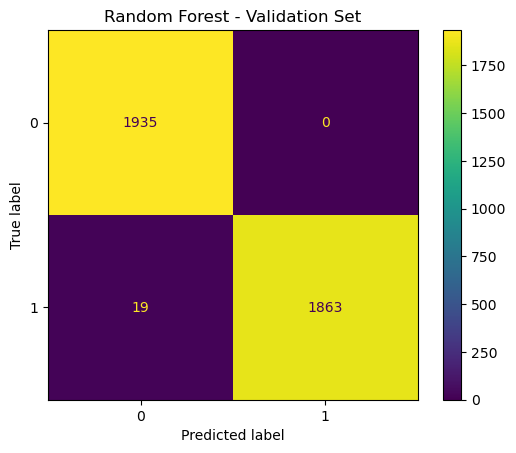

In [48]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix

cm = confusion_matrix(y_val, rf_pred, labels = rf_cv.classes_)

# Create display of confusion matrix using ConfusionMatrixDisplay()

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_cv.classes_)

# Plot confusion matrix

disp.plot()

# Display plot
plt.title("Random Forest - Validation Set")
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.
<br> </br>

**Note:** In other labs there was a custom-written function to extract the accuracy, precision, recall, and F<sub>1</sub> scores from the GridSearchCV report and display them in a table. You can also use scikit-learn's built-in [`classification_report()`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) function to obtain a similar table of results.

In [49]:
# Create a classification report
# Create classification report for random forest model

from sklearn.metrics import classification_report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, rf_pred, target_names = target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1935
       claim       1.00      0.99      0.99      1882

    accuracy                           1.00      3817
   macro avg       1.00      0.99      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

**Classification Report**

  * **opinion (class 0 )** - Precision = 0.99, Recall = 1.00, F1-Score = 1.00 - The model almost never misclassifies opinions and thereby correctly classifies nearly all cases.
  * **claim (class 1)** - Precision = 1.00, Recall = 0.99, F1-Score = 0.99 - The model is extrmeely accurate at detecting claims and only has a very small number of missed cases.
  * **Overall Accuracy** - 1.00 - The model achieves nearly perfect predictions across the dataset.
  * **Macro & Weighted Averages** - essentially 1.00 - showing balanced performance between both classes and therefore there is no bias towards one label over another.

**Confusion Matrix**

* **True Negatives = 1935** - True opinions correctly classified as opinions
* **False Positives = 0** - No opinions were wrongly classified as claims
* **False Negatives = 19** - A very small number of claims were misclassified as opinions.
* **True Positives = 1863** - True claims predicted correctly as claims.

The classification report shows that the model performs with a near perfect accuracy, achieving precision and recall scores that are close to 1.0 for both the opinion and claim classes. The confusion matrix supports this and indicates that all opinions were correctly classified and only 19 claims were misclassified as opinions, while the rest were correctly predicted. Therefore, this demonstrates that the model is highly effective at distinguishing between claims and opinions, with only a very small margin of error.

#### <a id='toc1_7_1_2_'></a>[XGBoost](#toc0_)

Now, evaluate the XGBoost model on the validation set.

In [56]:
# Use the best estimator to predict on the validation data

xgb_pred = xgb_cv.best_estimator_.predict(X_val)
xgb_pred

array([1, 0, 0, ..., 0, 0, 1], shape=(3817,))

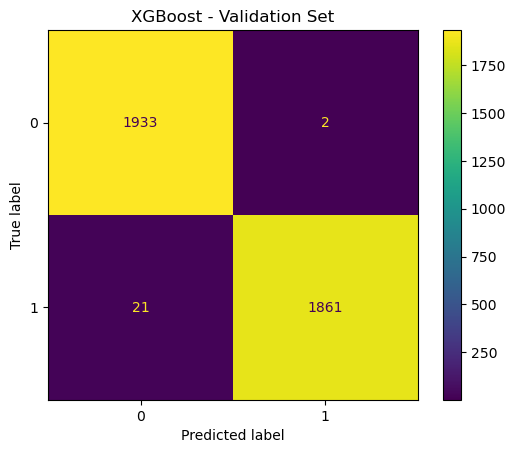

In [57]:
# Compute values for confusion matrix

cm = confusion_matrix(y_val, xgb_pred, labels = xgb_cv.classes_)

# Create display of confusion matrix using ConfusionMatrixDisplay()

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_cv.classes_)

# Plot confusion matrix

disp.plot()

# Display plot
plt.title("XGBoost - Validation Set")
plt.show()


In [59]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, xgb_pred, target_names = target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1935
       claim       1.00      0.99      0.99      1882

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

**Model Results**

The model achieved precision, recall and F1 scores of 0.99-1.0 for both of the classes, which is almost identical to the Random Forest Model. The confusion matrix also shows that out of 3817 examples, only 21 claims were misclassified as opinions and only 2 opinions were misclassified as claims, while all the other instances were classified correctly. Therefore, this is indicative that the XGBoost model delivers a near perfect classification performance.

**Comparison with Random Forest Classifier**

Both of the models performed nearly identically, both achieving extremely high precision, recall and F1 scores. While the Random Forest Model misclassified 19 claims as opinions, the XGBoost Model misclassified 21 claims as opinions and 2 opinions as claims. This means that the Random Forest Model was slightly more balanced in handling both classes, whereas the XGBoost introduced a few additional errors. However, the overall performance difference is minimal and both Models demonstrate a near perfect ability to seperate claims from opinions.

To identify the true "champion model" is through additionall testing on unseen holdout data which would be valuable to confirm which model generalises better in practice.

**Model Selection Justification**

Although XGBoost is a highly effective Gradient Boosting Machine that has produced excellent results, it is however considered a black-box model. This makes its predictions harder to interpret and GBMs are generally less transparent in how decisions are made. On the other hand, the Random Forest Model provides not only an equally strong performance but also better interpretability. Interpretability and Stakeholder trust are crucial for this project, and given that the Random Forest slightly outperformed the XGBoost in terms of fewer misclassifications, the **Random Forest Model is selected as the final champion model**. It balances strong predictive performance with the ability to explain results, thereby making it the more practical choice for claims classification.


#### <a id='toc1_7_1_3_'></a>[Use champion model to predict on test data](#toc0_)

In [61]:
rf_pred_test = rf_cv.best_estimator_.predict(X_test)

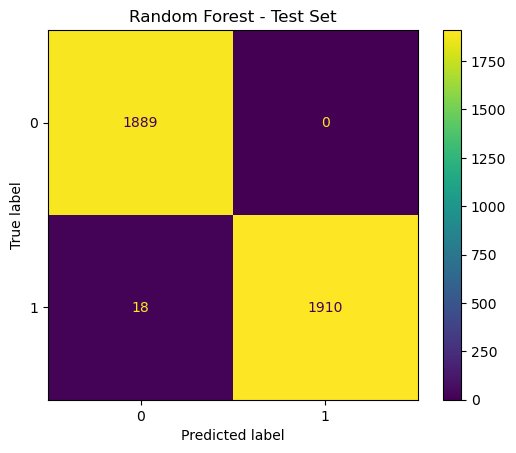

In [63]:
# Compute values for confusion matrix

cm = confusion_matrix(y_test, rf_pred_test, labels = rf_cv.classes_)

# Create display of confusion matrix using ConfusionMatrixDisplay()

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_cv.classes_)

# Plot confusion matrix

disp.plot()

# Display plot
plt.title("Random Forest - Test Set")
plt.show()


#### <a id='toc1_7_1_4_'></a>[Feature importances of champion model](#toc0_)

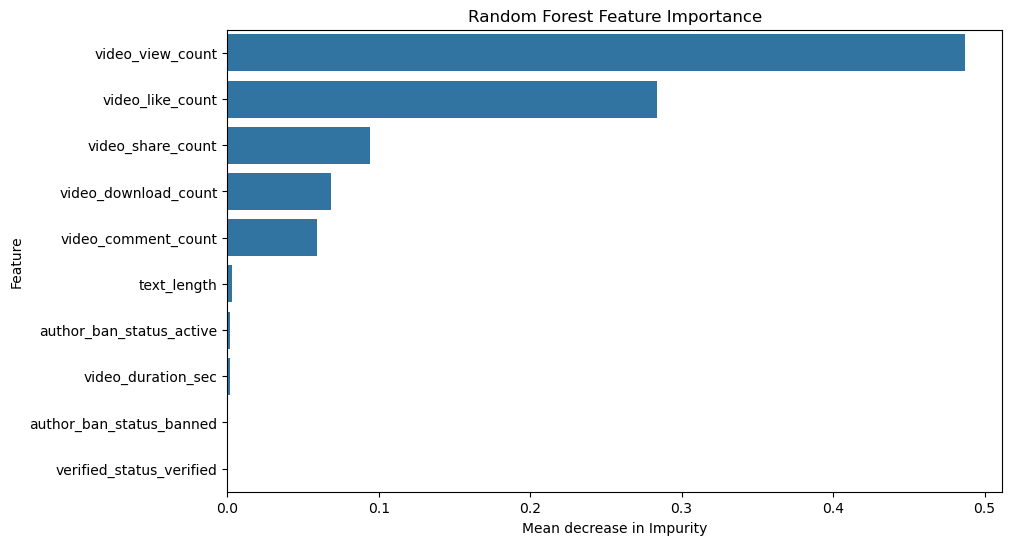

In [ ]:
importances = rf_cv.best_estimator_.feature_importances_
features = X_test.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))

sns.barplot(x = 'Importance', y = 'Feature', data = feat_imp)
plt.title("Random Forest Feature Importance")
plt.xlabel("Mean decrease in Impurity")
plt.ylabel("Feature")
plt.show()

**Question:** Describe your most predictive features. Were your results surprising?

The most predicitve features in the Random Forest Model that are based on the Mean Decrease in Impurity were `video_view_count`, `video_like_count` and `video_share_count`. These features produced the greatest overall reduction in impurity across the Decision Trees, indicating that they were the strongest drivers of the Model's predictions. This result makes intuitive sense as videos with high engagement (views, likes and shares) are more likely to contain claims that attract widespread attention and discussion. On the other hand, features such as `author_ban_status` and `verified_status` contributed very little to the impurity reduction and therefore had minimal influence on the Model.

The results are not particularly surprising, since the engagement metrics are often strong predictors of whether content spreads widely, which is a typical characteristic of claims. However, it was somewhat unexpected that `text_length`, which might have been assumed to influence Classification, showed very low impurity reduction compared to engagement-based features.


### <a id='toc1_7_2_'></a>[Task 8. Conclusion](#toc0_)

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


1. Yes I would recommend using the Random Forest Model, even though both the Random Forest and XGBoost Model achieved near perfect performance in terms of precision, recall and F1 scores, Random Forest Models are easier to interpret and is generally more transparent than XGBoost, which functions like a black box model. Since the interpretability is crucial for the Stakeholders, the Random Forest Classifier Models is the more practical choice.

2. The model was learning the patterns from the engagement features such as `video_view_counts`, `video_like_counts`, `video_share_counts` and `video_comment_counts` in order to distinguish between claims and opinions. It then identified which features were most predictive (`video_view_counts`, `video_like_counts`) and used decision trees within the Random Forest ensemble to classify new examples accurately.

3. Yes, additional features such as **Sentiment Analysis** of the text, **Linguistic Complexity Measures** (e.g. presence of factual words vs. subjective language), or **Topic Modelling** of the transcription text could provide richer signals for distinguishing between claims and opinions.

4. I would want access to **Fact-Checking Results** (whether the claim has been verified externally), **User Credibility Metrics** (such as history of spreading misinformation), **Temporal Features** (how quickly engagement grows after posting) and **Engagement Quality Metrics** (ratio of likes to views, comment sentiment). These would improve the classification further by providing stronger context about the difference between opinions and claims.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.